# Notebook for preselection of Tüpraş Datathon

#### Ulaş Filiz
#### Öykü Büyükakın
#### Belemir Atik

First step is to import libraries, pandas, numpy and matplotlib are the most important libraries to be used.Apart from these, ML libraries and encoding prediction libraries are used.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import cchardet as chardet 
from pathlib import Path
import sys
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Cchardet is a fast version of Chardet library, which is an encoding prediction tool. We used it because standard encoding methods were not enough.As you can see the first standard encoding predicting was not successful on the data.

In [2]:
"""A tool for reading text files with an unknown encoding."""

def read_confidently(filename):
    """Detect encoding and return decoded text, encoding, and confidence level."""
    filepath = Path("/work/data.set.csv")

    # We must read as binary (bytes) because we don't yet know encoding
    blob = filepath.read_bytes()

    detection = chardet.detect(blob)
    encoding = detection["encoding"]
    confidence = detection["confidence"]
    text = blob.decode(encoding)

    return text, encoding, confidence



text, encoding, confidence = read_confidently("/work/data.set.csv")


print(encoding)
text = text.split('\n')

data=[]
for each in text:
  temp = each.split(';')
  data.append(temp)

df = pd.DataFrame(data[1:], columns=data[0])

ISO-8859-9


ISO-8859-9 encoding standard is a member of ISO 8859 family. It is an encoding standart made by ISO. ISO 8859-9 was specific for Turkish characters.

In [3]:
# Reading dataset
data = pd.read_csv( "/work/data.set.csv",encoding='ISO-8859-9', sep=";")

## Preprocessing

### Data observation
In this section, data will be checked superficially.

In [4]:
data.head(10) # Checking first 10 elements

,Sütun1,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
0,2612,2612.0,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,4819.0,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,149.0,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,3628.0,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,3936.0,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"
5,2704,2704.0,110000,4.0,110.0,20.0,Kombi,Uygun,Bahçe Katı,1.0,Sincan,549108.0,Lise,"1,44"
6,3793,3793.0,347000,7.0,210.0,10.0,Kombi,Uygun,Teras Katı,2.0,Sincan,549108.0,Lise,"1,44"
7,1049,1049.0,495000,3.0,100.0,35.0,Merkezi,Uygun,Yüksek Giriş,1.0,Çankaya,925828.0,Lisans,"0,7"
8,3313,3313.0,1250000,5.0,195.0,0.0,Merkezi(PayÖlçer),Uygun,4. Kat,2.0,Keçiören,938565.0,Lise,"1,43"
9,1566,1566.0,315000,4.0,115.0,22.0,Kombi,Uygun,En Üst Kat,1.0,Çankaya,925828.0,Lisans,"0,7"


In [5]:
print(data.info()) # Data is being checked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sütun1                4222 non-null   int64  
 1   id                    4220 non-null   float64
 2   fiyat                 4212 non-null   object 
 3   oda_salon_sayisi      4213 non-null   float64
 4   net_m2                4213 non-null   float64
 5   bina_yasi             4216 non-null   float64
 6   isinma_tipi           4218 non-null   object 
 7   krediye_uygunluk      4218 non-null   object 
 8   bulundugu_kat         4218 non-null   object 
 9   banyo_sayisi          4214 non-null   float64
 10  ilce                  4215 non-null   object 
 11  nüfus                 4214 non-null   float64
 12  eğitim                4217 non-null   object 
 13  okuma_yazma_bilmeyen  4217 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 461.9+ KB
None


Missing values are present, also there are many faulty types (object types are present).For example, banyo_sayisi variable is a discrete variable but in here it have float type.

In [6]:
data.describe()

,Sütun1,id,oda_salon_sayisi,net_m2,bina_yasi,banyo_sayisi,nüfus
count,4222.000000,4220.000000,4213.000000,4213.000000,4216.000000,4214.000000,4214.000000
mean,2482.219090,2481.717536,4.327795,130.339900,16.164374,1.468913,873334.921690
std,1430.248129,1430.400437,3.989371,52.036707,12.133765,0.933262,137041.184327
min,1.000000,1.000000,1.000000,-98.000000,0.000000,1.000000,549108.000000
25%,1235.250000,1234.750000,4.000000,105.000000,4.000000,1.000000,925828.000000
50%,2493.500000,2492.500000,4.000000,120.000000,16.000000,1.000000,925828.000000
75%,3712.750000,3713.750000,4.000000,140.000000,25.000000,2.000000,938565.000000
max,4957.000000,4957.000000,153.000000,600.000000,55.000000,21.000000,938565.000000


From statistical perspective, it is conclusible that the data has unlogical areas. Most significant example is that the feature 'net_m2' has -98 value, which is not a logical sample for its definition.

### Data Analysis and Cleaning

In [7]:
#Sütunlara ait NA sayıları
missing_values_count = data.isnull().sum()
print(missing_values_count)

Sütun1                   0
id                       2
fiyat                   10
oda_salon_sayisi         9
net_m2                   9
bina_yasi                6
isinma_tipi              4
krediye_uygunluk         4
bulundugu_kat            4
banyo_sayisi             8
ilce                     7
nüfus                    8
eğitim                   5
okuma_yazma_bilmeyen     5
dtype: int64


In [8]:
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
### Verinin % kaçı kayıp?
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.13703728767679502


In this code piece, percentage and placement of missing values are checked.Data has NA of 13 percent.

### Sütun1 and id variable

'id' and 'sütun1' features are identical, although id has missing values, hence it is

In [9]:
data['id'].isnull().unique()

array([False,  True])

In [10]:
del data['id']

From this code we can find the indexes of the data with NA values.Since very little data is lost and the id variable is unpredictable, we chose to delete it.

In [11]:
data=data.rename(columns={'Sütun1': 'id'})

In [12]:
data.head() #we check from here

,id,fiyat,oda_salon_sayisi,net_m2,bina_yasi,isinma_tipi,krediye_uygunluk,bulundugu_kat,banyo_sayisi,ilce,nüfus,eğitim,okuma_yazma_bilmeyen
0,2612,275000,4.0,120.0,12.0,Kombi,Uygun,Kot 1,1.0,Çankaya,925828.0,Lisans,"0,7"
1,4819,700000,3.0,88.0,0.0,Merkezi(PayÖlçer),Uygun,1. Kat,1.0,Çankaya,925828.0,Lisans,"0,7"
2,149,980000,5.0,230.0,30.0,Kombi,Uygun,3. Kat,2.0,Çankaya,925828.0,liSans,"0,7"
3,3628,385000,4.0,120.0,22.0,Kombi,Uygun,2. Kat,1.0,Keçiören,938565.0,Lise,"1,43"
4,3936,700000,5.0,150.0,0.0,Kombi,Uygun,Ara Kat,2.0,Çankaya,925828.0,Lisans,"0,7"


### fiyat variable

With this code, we find the indexes of NA.

In [13]:
np.where(data['fiyat'].isnull())

(array([ 638,  697,  880,  966, 2060, 2516, 2707, 4142, 4204, 4218]),)

In [14]:
fiyat = []
fiyat_data = data.fiyat.copy()
fiyat_data = fiyat_data.fillna('0')
for each in fiyat_data.values:
    if((',' in each) & ('E' in each)):
        temp = each
        temp = temp.replace(',', '.')
        temp = temp.replace('E', 'e')
        fiyat.append(temp)
    else:
        fiyat.append(each)

fiyat = pd.DataFrame(fiyat)
data.fiyat = fiyat.astype(float)
data['fiyat'] = data['fiyat'].replace(0, data.fiyat.mean())


We give a value and constrain the data and we found the indexes of the selected outliers.We fill them with the median and do the type conversion as well.

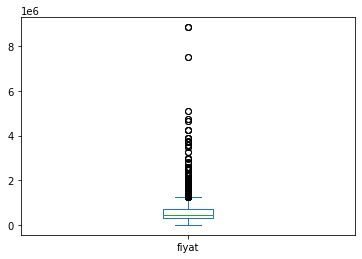

In [15]:
data.fiyat.plot(kind='box')
plt.show()

In [16]:
data.fiyat = data.fiyat.interpolate(method = 'pad')

In [17]:
tenth_percentile = np.percentile(data['fiyat'], 10)
ninetieth_percentile = np.percentile(data['fiyat'], 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
data['fiyat']= np.where(data['fiyat']>ninetieth_percentile, ninetieth_percentile, data['fiyat'])
# print("Sample:", sample)
data.fiyat = data.loc[(data.fiyat>0.0) & (data.fiyat<=1e+06), 'fiyat']

### oda_salon_sayisi

in oda_salon_sayisi feature, a very abnormal outlier is observed. This should be eliminated, as it could harm the later visualizations.

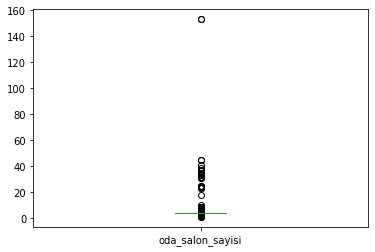

In [18]:
data.oda_salon_sayisi.plot(kind='box')
plt.show()

We observe the outlier from the graph belong to 'oda_salon_sayisi, we give a value and constrain the data and we found the indexes of the selected outliers.

In [19]:
c=(data['oda_salon_sayisi'] >= 140)
print(data[c])


       id  fiyat  oda_salon_sayisi  net_m2  bina_yasi isinma_tipi  \
1751  143    NaN             153.0   110.0        0.0       Kombi   
3579  712    NaN             153.0   110.0        0.0       Kombi   

     krediye_uygunluk bulundugu_kat  banyo_sayisi      ilce     nüfus  eğitim  \
1751            Uygun        3. Kat           2.0   Çankaya  925828.0  Lisans   
3579            Uygun        3. Kat           2.0  Keçiören  938565.0    Lise   

     okuma_yazma_bilmeyen  
1751                  0,7  
3579                 1,43  


In [20]:
data['oda_salon_sayisi'].isnull().value_counts()

False    4213
True        9
Name: oda_salon_sayisi, dtype: int64

We fill these values ​​with mode.

In [21]:
data['oda_salon_sayisi'].mode().values  
#mode değeri 4


array([4.])

In [22]:
data.oda_salon_sayisi[data.oda_salon_sayisi > 140] = np.nan
data['oda_salon_sayisi'] = data['oda_salon_sayisi'].fillna(data['oda_salon_sayisi'].mode()[0])
data['oda_salon_sayisi'] = data['oda_salon_sayisi'].astype(int)


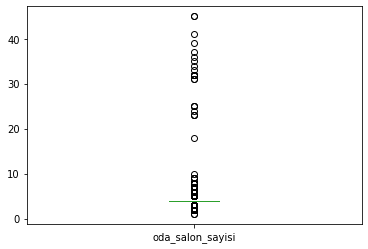

In [23]:
data['oda_salon_sayisi'].plot(kind='box')  #new graph
plt.show()

### net_m2

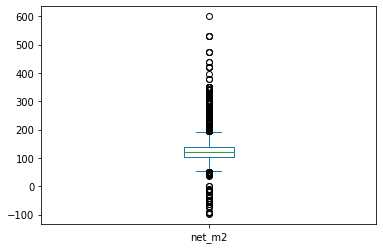

In [24]:
data.net_m2.plot(kind = 'box')
plt.show()

In [25]:
# net_m2 outlier elimination and missing value imputation 
# negative values are being eliminated, and np.nan values are filled.
data['net_m2'] = data['net_m2'].abs()
#data.net_m2[data.net_m2 > 180] = np.nan
data.net_m2 = data.net_m2.interpolate(method = 'pad', limit_direction ='forward')
data['net_m2'] = data['net_m2'].astype('int')

### bina_yasi

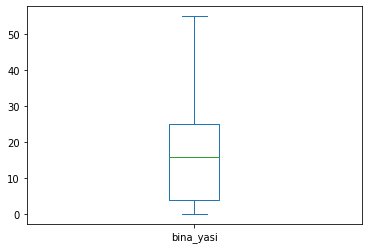

In [26]:
data['bina_yasi'].plot(kind='box')
plt.show()

We filled 'bina_yasi' variable with mode and type conversion is done.

In [27]:
data['bina_yasi'] = data['bina_yasi'].fillna(data['bina_yasi'].mode()[0])
data['bina_yasi'] = data['bina_yasi'].astype(int)

### isinma_tipi

In [28]:
data['isinma_tipi'].value_counts()

Kombi                3032
Merkezi               743
Merkezi(PayÖlçer)     434
KatKaloriferi           5
Klima                   4
Name: isinma_tipi, dtype: int64

In [29]:
data['isinma_tipi'].unique()

array(['Kombi', 'Merkezi(PayÖlçer)', 'Merkezi', 'KatKaloriferi', nan,
       'Klima'], dtype=object)

We fill the 'isinma_tipi' NA with the most frequent strategy simple imputation and convert it to string.

In [30]:
median_isinma = data["isinma_tipi"].value_counts().idxmax()
data["isinma_tipi"] = data["isinma_tipi"].fillna(median_isinma)

### krediye_uygunluk

In [31]:
data['krediye_uygunluk'].unique()

array(['Uygun', 'Uygun değil', nan], dtype=object)

In [32]:
data['krediye_uygunluk'].value_counts()

Uygun          4145
Uygun değil      73
Name: krediye_uygunluk, dtype: int64

With the label encoder, the category is predicted and the NA are filled in this way.

In [33]:
data['krediye_uygunluk'] = data['krediye_uygunluk'].fillna('Belirsiz').astype('str')

# Applying binary encoding
le = sklearn.preprocessing.LabelEncoder()
data['krediye_uygunluk'] = le.fit_transform(data['krediye_uygunluk'])

### bulunduğu_kat

In [34]:
data['bulundugu_kat'].unique() 

array(['Kot 1', '1. Kat', '3. Kat', '2. Kat', 'Ara Kat', 'Bahçe Katı',
       'Teras Katı', 'Yüksek Giriş', '4. Kat', 'En Üst Kat', '9. Kat',
       'Kot 2', '5. Kat', '6. Kat', '7. Kat', '21 ve üzeri', 'Giriş Katı',
       '13. Kat', 'Zemin', '12. Kat', '14. Kat', '11. Kat', '15. Kat',
       '20. Kat', 'Kot 3', '8. Kat', '17. Kat', 'Çatı Katı', nan,
       '16. Kat', '10. Kat', '19. Kat', 'Bodrum', 'Villa Katı'],
      dtype=object)

Initially, features starting with 'kot' thought as a typo. Although later research has showed that kot is a term used for floors under the entrance floor.

In [35]:
data['bulundugu_kat'].value_counts()

3. Kat          708
2. Kat          704
1. Kat          682
4. Kat          372
Yüksek Giriş    354
Kot 1           277
Giriş Katı      189
Bahçe Katı      129
5. Kat          125
Kot 2           121
6. Kat           70
En Üst Kat       54
Teras Katı       53
7. Kat           52
21 ve üzeri      43
8. Kat           40
Ara Kat          39
9. Kat           30
Zemin            28
10. Kat          26
12. Kat          25
11. Kat          19
15. Kat          17
14. Kat          16
13. Kat          12
Kot 3             9
17. Kat           6
Çatı Katı         5
19. Kat           5
Villa Katı        3
20. Kat           2
Bodrum            2
16. Kat           1
Name: bulundugu_kat, dtype: int64

The most frequent value among the different classes of bulundugu_kat feature is taken and this value is filled with the median and the string is made as it should be.

In [36]:
data['bulundugu_kat'] = data['bulundugu_kat'].str.replace('Kot 1','-1. Kat')
data['bulundugu_kat'] = data['bulundugu_kat'].str.replace('Kot 2','-2. Kat')
data['bulundugu_kat'] = data['bulundugu_kat'].str.replace('Kot 3','-3. Kat')
median_kat = data["bulundugu_kat"].value_counts().idxmax()
data['bulundugu_kat'] = data['bulundugu_kat'].fillna(median_kat)
data['bulundugu_kat'] = data['bulundugu_kat'].astype(str)


### banyo_sayisi

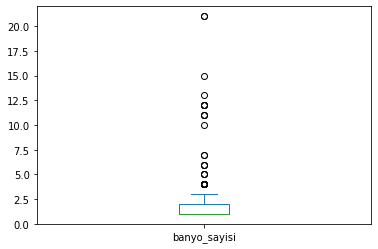

In [37]:
data['banyo_sayisi'].plot(kind='box')
plt.show()

The value is selected according to the median, NA is filled and type conversion is done.

In [38]:
median = data.loc[data['banyo_sayisi']<=3, 'banyo_sayisi'].median()
data.loc[data['banyo_sayisi']>3, 'banyo_sayisi'] = np.nan
data['banyo_sayisi'] = data['banyo_sayisi'].fillna(median)
data['banyo_sayisi']=data['banyo_sayisi'].astype('int')

### ilce

In [39]:
data['ilce'].unique() 

array(['Çankaya', 'Keçiören', 'Sincan', 'Mamak', 'cankaya', nan],
      dtype=object)

ilce and eğitim categories have typos to be rewritten.

In [40]:
data['ilce']=data['ilce'].str.replace('cankaya','Çankaya')

In [41]:
data.ilce.value_counts()

Keçiören    1778
Çankaya     1776
Sincan       615
Mamak         46
Name: ilce, dtype: int64

We impute ilce with the strategy of most frequent.

In [42]:
median_ilce = data["ilce"].value_counts().idxmax()
data["ilce"] = data["ilce"].fillna(median_ilce)

### nüfus

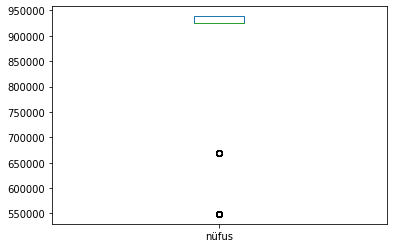

In [43]:
data['nüfus'].plot(kind='box')
plt.show()

We observe the outlier from the graph belong to 'nüfus', we give a value and constrain the data and we found the indexes of the selected outliers.We fill them with the median and do the type conversion as well.

In [44]:
median = data.loc[data['nüfus']>750000, 'nüfus'].median()
data.loc[data['nüfus']<750000, 'nüfus'] = np.nan
data['nüfus'] = data['nüfus'].fillna(median)
data['nüfus'] = data['nüfus'].astype('int')

### eğitim

In [45]:
data['eğitim'].unique() 

array(['Lisans', 'liSans', 'Lise', 'liS3', nan], dtype=object)

Rewriting ilce and eğitim typos.

In [46]:
data['eğitim']=data['eğitim'].str.replace('liSans','Lisans')
data['eğitim']=data['eğitim'].str.replace('liS3','Lise')
data['eğitim'].unique()

array(['Lisans', 'Lise', nan], dtype=object)

In [47]:
data['eğitim'].value_counts()

Lise      2441
Lisans    1776
Name: eğitim, dtype: int64

In [48]:
data['eğitim'] = data['eğitim'].fillna('Lisans').astype('str')

### okuma_yazma_bilmeyen

In [49]:
data['okuma_yazma_bilmeyen'].value_counts()

1,43    1770
0,7     1766
1,44     612
1,9       45
0         24
Name: okuma_yazma_bilmeyen, dtype: int64

Error occurs in variable conversion because of period and comma.Then type conversion is done.

In [50]:
okuma = []
bilmeyen = data['okuma_yazma_bilmeyen'].copy()
bilmeyen = bilmeyen.fillna('2')
for each in bilmeyen.values:
    if(',' in each):
        temp = each
        temp = temp.replace(',', '.')
        okuma.append(temp)
    else:
        okuma.append(each)


In [51]:
data['okuma_yazma_bilmeyen'] = okuma
data['okuma_yazma_bilmeyen'] = data['okuma_yazma_bilmeyen'].astype(float)
print(data['okuma_yazma_bilmeyen'])

0       0.70
1       0.70
2       0.70
3       1.43
4       0.70
        ... 
4217    0.70
4218    1.43
4219    1.43
4220    1.43
4221    1.43
Name: okuma_yazma_bilmeyen, Length: 4222, dtype: float64


In [52]:
data['okuma_yazma_bilmeyen'].value_counts()

1.43    1770
0.70    1766
1.44     612
1.90      45
0.00      24
2.00       5
Name: okuma_yazma_bilmeyen, dtype: int64

In [53]:
mode = data.loc[data['okuma_yazma_bilmeyen']< 1.90, 'okuma_yazma_bilmeyen'].mode()
mode[0]

1.43

We learned mode with code and then put back with loc.Then fill NA with this.

In [54]:
mode = data.loc[data['okuma_yazma_bilmeyen']!=2.00, 'okuma_yazma_bilmeyen'].mode()[0]

data.loc[data['okuma_yazma_bilmeyen']==2.00, 'okuma_yazma_bilmeyen'] = np.nan

data['okuma_yazma_bilmeyen'].fillna(mode,inplace=True)


In [55]:
data['okuma_yazma_bilmeyen'].value_counts()

1.43    1775
0.70    1766
1.44     612
1.90      45
0.00      24
Name: okuma_yazma_bilmeyen, dtype: int64

In [56]:
data.info()   #variable type control

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4222 non-null   int64  
 1   fiyat                 3743 non-null   float64
 2   oda_salon_sayisi      4222 non-null   int64  
 3   net_m2                4222 non-null   int64  
 4   bina_yasi             4222 non-null   int64  
 5   isinma_tipi           4222 non-null   object 
 6   krediye_uygunluk      4222 non-null   int64  
 7   bulundugu_kat         4222 non-null   object 
 8   banyo_sayisi          4222 non-null   int64  
 9   ilce                  4222 non-null   object 
 10  nüfus                 4222 non-null   int64  
 11  eğitim                4222 non-null   object 
 12  okuma_yazma_bilmeyen  4222 non-null   float64
dtypes: float64(2), int64(7), object(4)
memory usage: 428.9+ KB


Final outlier result is as follows:

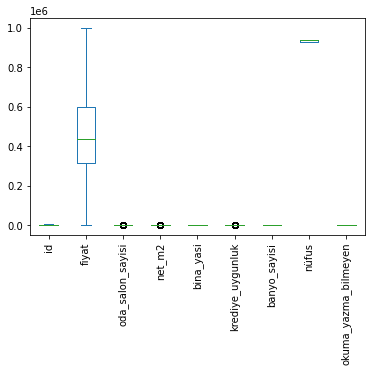

In [57]:
data.plot(kind='box')
plt.xticks(rotation = 90)
plt.show()

Only fiyat has certain outliers, but it isthought that traditional outlier handling methods could harm data sentimentality by a great data loss with this much of outlier data

### Mission 1 is complete!

### 2.

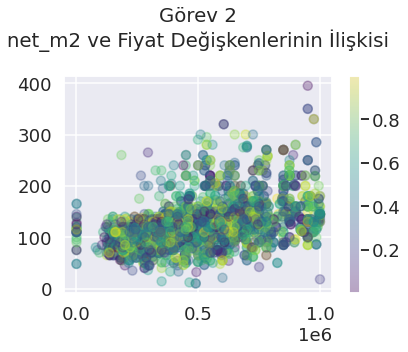

In [74]:
rng = np.random.RandomState(0)

colors = rng.rand(4222)


plt.scatter(data['fiyat'], data['net_m2'], c=colors, alpha=0.3,
            cmap='viridis')
plt.colorbar(); 
plt.title('Görev 2\nnet_m2 ve Fiyat Değişkenlerinin İlişkisi\n')
plt.show()

'net_m2' has a linear, maybe slightly quadratic, relationship with fiyat. Even though there are some outliers, the data has enough characteristic samples for concluding a relationship between the 2 features. There are some samples which are very close to zero that are shown as zero in this graphic, there are difference in their scales, so it is not healthy to conclude from data close to zero.

### 3.

'bulundugu_kat' variable defined at 'seviye' variable as an object.Then 'katlar' added to dataframe for easy visualization.There was a blank space in the data, we deleted it from it.


In [59]:
seviye={'Bodrum':-4,'-3. Kat':-3,'Kot 3':-3,'Kot 2':-2,'-2. Kat':-2,
'-1. Kat':-1,'Kot 1':-1,'Zemin':0,'1. Kat':2,
'2. Kat':2,'3. Kat':3,'Ara Kat':0,'Bahçe Katı':0,
'4. Kat':4,'5. Kat':5,'Giriş Katı':0,
'6. Kat':6,'7. Kat':7,'8. Kat':8,'9. Kat':9,'10. Kat':10,'11. Kat':11,'12. Kat':12,
'13. Kat':13,'14. Kat':14,'15. Kat':15,'16. Kat':16,'17. Kat':17,'18. Kat':18,
'19. Kat':19,'20. Kat':20,'21 ve üzeri':21,'18. Kat':18,'Teras Katı':0,
'Yüksek Giriş':0,'En Üst Kat':22,'Çatı Katı':22,
'Villa Katı':0}
data['katlar']=data['bulundugu_kat'].replace(seviye)
data.drop(data.index[data['katlar'] == ''], inplace = True)

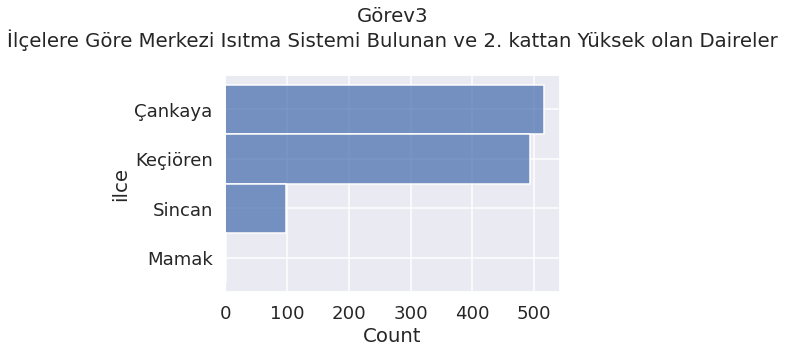

In [69]:
data_gorev3 = data.loc[(data['isinma_tipi']=='Merkezi')|(data['isinma_tipi'] == 'Merkezi(PayÖlçer)')&(data['katlar']>=2), 'ilce']
data_gorev3 = pd.DataFrame(data_gorev3, columns=['ilce'])
sns.histplot(data=data_gorev3, y='ilce')
plt.title('Görev3\nİlçelere Göre Merkezi Isıtma Sistemi Bulunan ve 2. kattan Yüksek olan Daireler\n')
plt.show()

As we can see from the graph,'merkezi' and 'merkezi(payölçer)' are most common in Çankaya and Keçiören. Meanwhile it has less use in Sincan,Mamak as they never, or scarcely, use such a  heating system.

### 4.

In [61]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


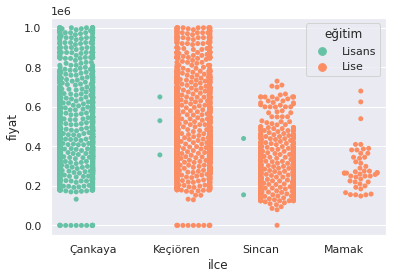

In [62]:
sns.set_theme(style="darkgrid")
sns.swarmplot(x="ilce", y="fiyat", hue="eğitim",
                   data=data, palette="Set2", dodge=True)
plt.show()

First of all, we visualized the variables of 'ilce', 'fiyat' and 'eğitim' to get a forethought. 

In [63]:
Görev4 = data.loc[((data['eğitim']=='Lisans') > (data['eğitim']=='Lise'))&(data['fiyat']<5000), 'ilce']

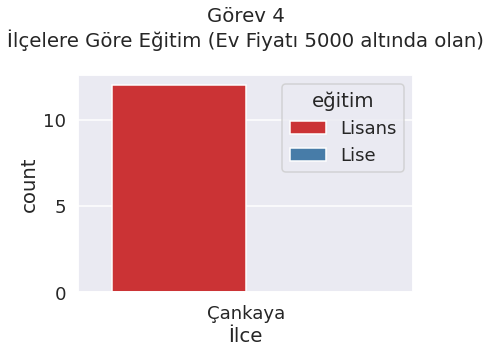

In [72]:
Görev4 = pd.DataFrame(Görev4, columns=['ilce'])
sns.countplot(x='ilce', palette="Set1", hue=data["eğitim"], data=Görev4)
plt.title('Görev 4\nİlçelere Göre Eğitim (Ev Fiyatı 5000 altında olan)\n')
plt.xlabel('İlce')
plt.show()

Then, we wrote down the conditions to see which 'ilce' should be preferred by someone who wants to live in a 'ilce' with a high rate of 'Lisans' students and in a house with a price of less than 5000. According to the inferences made from the chart, it was decided that Çankaya was the best option as the province with a high rate of undergraduates and houses with a price of less than 5000 because of there was not enough data in other provinces for 'Lisans students'.

### 5.

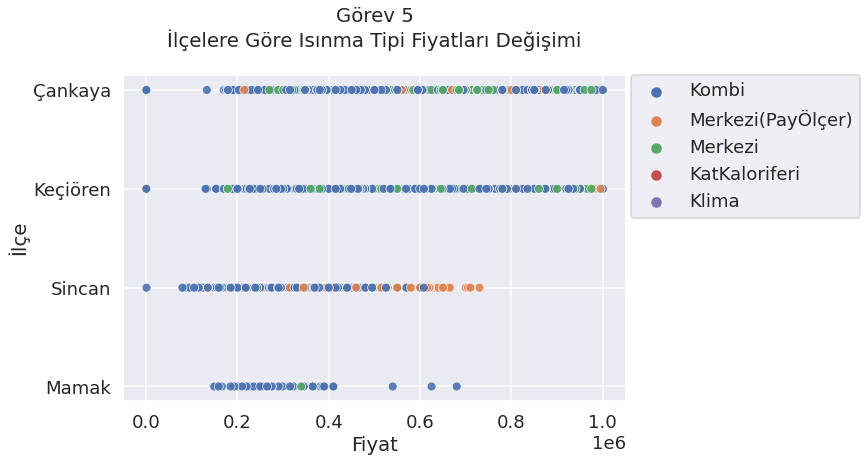

In [71]:
sns.set_context('talk', font_scale=1.1)
plt.figure(figsize=(9, 6))
sns.scatterplot(data.fiyat, data.ilce, data=data,
               sizes=(200, 500), hue="isinma_tipi", 
                alpha=0.9, palette="deep")
plt.xlabel("Fiyat")
plt.ylabel("İlçe")
plt.title("Görev 5\nİlçelere Göre Isınma Tipi Fiyatları Değişimi\n")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad=0)
plt.show()


As we look at different heating systems in each 'ilce', it is observable that 'kombi' is the cheapest among all 'isinma_tipi' feature values. In Çankaya, 'Merkezi' and 'Merkezi(PayÖlçer)' has some cheaper options. In this feature analysis, unstability of 'ilce' feature would not affect the overall result as kombi is cheapest in all sample areas.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=860198db-9667-45d1-be99-8a329e5d65e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>